## Data Analysis By Using R

In [1]:
## install the dependcies 

library(tidyverse) ## wrangle the data
library(lubridate) ## wrangle the data attributes 
library(ggplot2) ## data visualization
library(tidyr) ## tidy data 
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Load the data


In [2]:
deliveries =read.csv('../input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv')
matches = read.csv('../input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')

In [3]:
head(deliveries)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
head(matches)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,NA,Asad Rauf,RE Koertzen
2,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,NA,MR Benson,SL Shastri
3,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,N,NA,Aleem Dar,GA Pratapkumar
4,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,NA,SJ Davis,DJ Harper
5,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,NA,BF Bowden,K Hariharan
6,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6,N,NA,Aleem Dar,RB Tiffin


## Inspect the dataframe 

In [5]:
## Matches dataframe 

class(matches)
str(matches)
colnames(matches)
summary(matches)

[1] "data.frame"

'data.frame':	816 obs. of  17 variables:
 $ id             : int  335982 335983 335984 335985 335986 335987 335988 335989 335990 335991 ...
 $ city           : chr  "Bangalore" "Chandigarh" "Delhi" "Mumbai" ...
 $ date           : chr  "2008-04-18" "2008-04-19" "2008-04-19" "2008-04-20" ...
 $ player_of_match: chr  "BB McCullum" "MEK Hussey" "MF Maharoof" "MV Boucher" ...
 $ venue          : chr  "M Chinnaswamy Stadium" "Punjab Cricket Association Stadium, Mohali" "Feroz Shah Kotla" "Wankhede Stadium" ...
 $ neutral_venue  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ team1          : chr  "Royal Challengers Bangalore" "Kings XI Punjab" "Delhi Daredevils" "Mumbai Indians" ...
 $ team2          : chr  "Kolkata Knight Riders" "Chennai Super Kings" "Rajasthan Royals" "Royal Challengers Bangalore" ...
 $ toss_winner    : chr  "Royal Challengers Bangalore" "Chennai Super Kings" "Rajasthan Royals" "Mumbai Indians" ...
 $ toss_decision  : chr  "field" "bat" "bat" "bat" ...
 $ winner         : chr  "Kolka

[1] "id"              "city"            "date"            "player_of_match"
 [5] "venue"           "neutral_venue"   "team1"           "team2"          
 [9] "toss_winner"     "toss_decision"   "winner"          "result"         
[13] "result_margin"   "eliminator"      "method"          "umpire1"        
[17] "umpire2"

       id              city               date           player_of_match   
 Min.   : 335982   Length:816         Length:816         Length:816        
 1st Qu.: 501228   Class :character   Class :character   Class :character  
 Median : 729298   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 756350                                                           
 3rd Qu.:1082626                                                           
 Max.   :1237181                                                           
                                                                           
    venue           neutral_venue        team1              team2          
 Length:816         Min.   :0.00000   Length:816         Length:816        
 Class :character   1st Qu.:0.00000   Class :character   Class :character  
 Mode  :character   Median :0.00000   Mode  :character   Mode  :character  
                    Mean   :0.09436                                        
            

In [6]:
## deliveries 

class(deliveries)
str(deliveries)
colnames(deliveries)
summary(deliveries)

[1] "data.frame"

'data.frame':	193468 obs. of  18 variables:
 $ id              : int  335982 335982 335982 335982 335982 335982 335982 335982 335982 335982 ...
 $ inning          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ over            : int  6 6 7 7 7 7 7 7 8 8 ...
 $ ball            : int  5 6 1 2 3 4 5 6 1 2 ...
 $ batsman         : chr  "RT Ponting" "BB McCullum" "BB McCullum" "BB McCullum" ...
 $ non_striker     : chr  "BB McCullum" "RT Ponting" "RT Ponting" "RT Ponting" ...
 $ bowler          : chr  "AA Noffke" "AA Noffke" "Z Khan" "Z Khan" ...
 $ batsman_runs    : int  1 1 0 1 1 1 1 1 0 0 ...
 $ extra_runs      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_runs      : int  1 1 0 1 1 1 1 1 0 0 ...
 $ non_boundary    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ is_wicket       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ dismissal_kind  : chr  NA NA NA NA ...
 $ player_dismissed: chr  NA NA NA NA ...
 $ fielder         : chr  NA NA NA NA ...
 $ extras_type     : chr  NA NA NA NA ...
 $ batting_team    : chr  "Kolkata Knight Riders

[1] "id"               "inning"           "over"             "ball"            
 [5] "batsman"          "non_striker"      "bowler"           "batsman_runs"    
 [9] "extra_runs"       "total_runs"       "non_boundary"     "is_wicket"       
[13] "dismissal_kind"   "player_dismissed" "fielder"          "extras_type"     
[17] "batting_team"     "bowling_team"

       id              inning           over             ball      
 Min.   : 335982   Min.   :1.000   Min.   : 0.000   Min.   :1.000  
 1st Qu.: 501227   1st Qu.:1.000   1st Qu.: 4.000   1st Qu.:2.000  
 Median : 729297   Median :1.000   Median : 9.000   Median :4.000  
 Mean   : 756769   Mean   :1.482   Mean   : 9.177   Mean   :3.616  
 3rd Qu.:1082628   3rd Qu.:2.000   3rd Qu.:14.000   3rd Qu.:5.000  
 Max.   :1237181   Max.   :2.000   Max.   :19.000   Max.   :9.000  
   batsman          non_striker           bowler           batsman_runs 
 Length:193468      Length:193468      Length:193468      Min.   :0.00  
 Class :character   Class :character   Class :character   1st Qu.:0.00  
 Mode  :character   Mode  :character   Mode  :character   Median :1.00  
                                                          Mean   :1.24  
                                                          3rd Qu.:1.00  
                                                          Max.   :6.00  
   extra_runs

## Total number of matches till

In [7]:
count(matches)

n
<int>
816


## Which team has won most number of matches?

In [8]:
matches %>% 
    group_by(winner) %>%
    summarize(wins = n() , .groups = 'drop')

winner,wins
<chr>,<int>
Chennai Super Kings,106
Deccan Chargers,29
Delhi Capitals,19
Delhi Daredevils,67
Gujarat Lions,13
Kings XI Punjab,88
Kochi Tuskers Kerala,6
Kolkata Knight Riders,99
Mumbai Indians,120


##  Plot the graph 

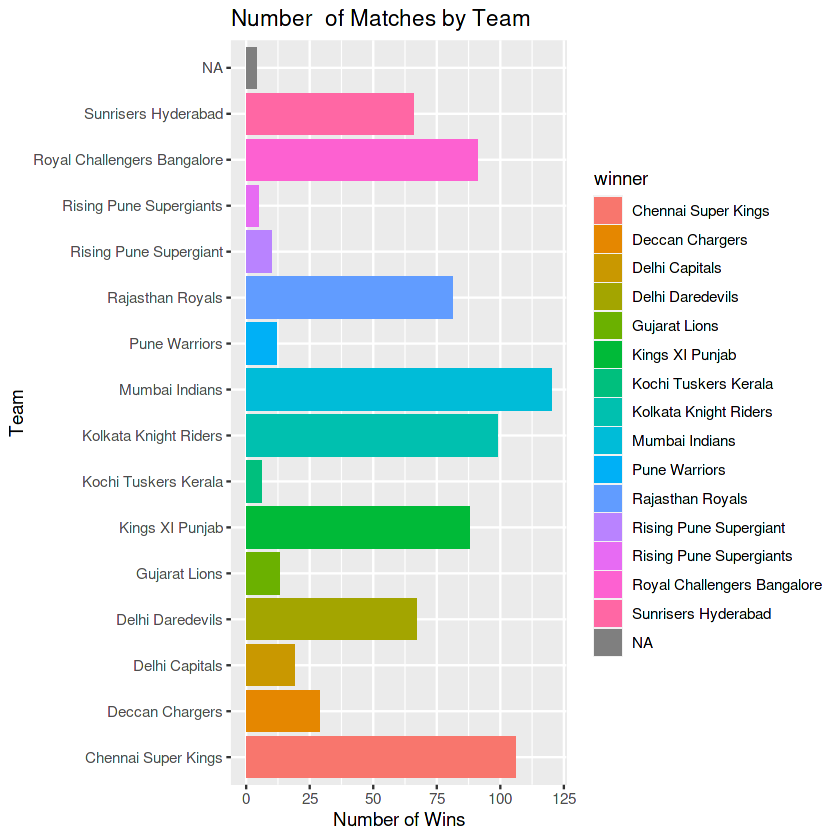

In [9]:
matches %>% 
    group_by(winner) %>%
    summarize(wins = n(), .groups= 'drop') %>%
    ggplot(aes(x=wins, y=winner, fill=winner)) + geom_col(position="dodge") + 
    labs(x="Number of Wins", y="Team", title = "Number  of Matches by Team")

#### Mumbai Indians won the most number of match leading the table and on second CSK also leading the table

## Who has got number of man of the match awards 

In [10]:
matches %>% 
    group_by(player_of_match) %>%
    summarize(awards = n())

player_of_match,awards
<chr>,<int>
A Chandila,1
A Kumble,3
A Mishra,11
A Nehra,6
A Nortje,2
A Singh,1
A Symonds,3
A Zampa,1
AA Jhunjhunwala,1


## Top 10 palyer got the Man of the match awards

In [11]:
matches %>% 
    group_by(player_of_match) %>%
    summarize(awards = n()) %>%
    top_n(10)
    

Selecting by awards



player_of_match,awards
<chr>,<int>
AB de Villiers,23
CH Gayle,22
DA Warner,17
G Gambhir,13
MS Dhoni,17
RG Sharma,18
SK Raina,14
SR Watson,16
V Kohli,13


### Plot the Top 10 players man of the match

Selecting by awards



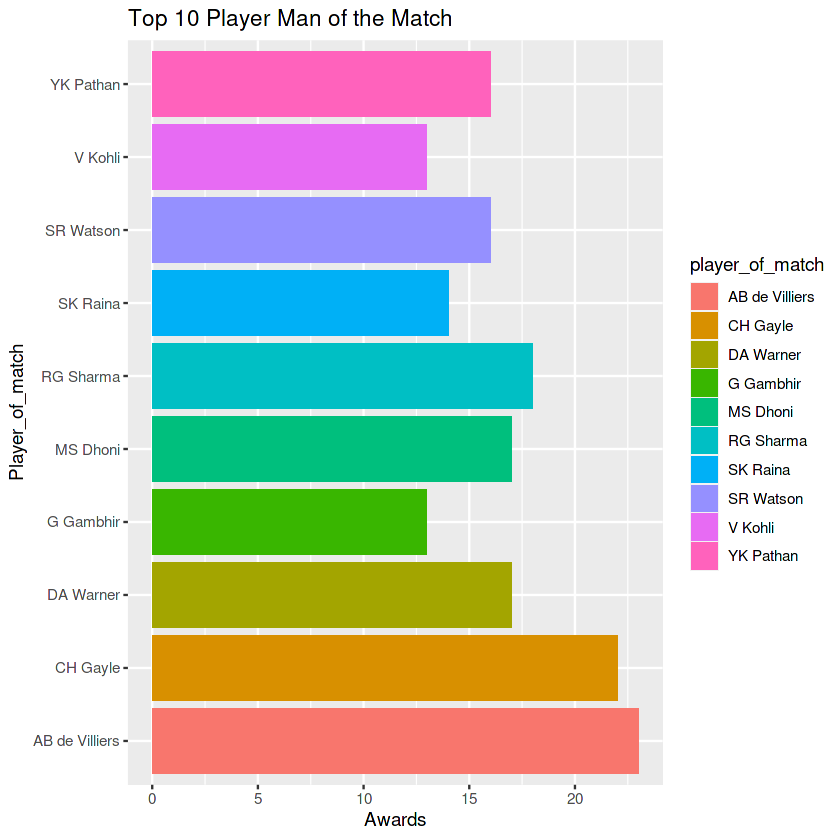

In [12]:
matches %>% 
    group_by(player_of_match) %>%
    summarize(awards = n()) %>% 
    top_n(10) %>%
    ggplot(aes(x = player_of_match, y=awards, fill=player_of_match)) + geom_col(position="dodge") +
    labs(x="Player_of_match", y = "Awards" , title = "Top 10 Player Man of the Match") + coord_flip()

## Convert the date column

In [13]:
matches$day <- format(as.Date(matches$date), "%d")
matches$month <- format(as.Date(matches$date), "%m")
matches$year <- format(as.Date(matches$date), "%Y")


## How many Seasons Got in the dataset

In [14]:
season_count <- length(unique(matches$year))
season_count

[1] 13

## Which team won by Wickets or Runs

In [15]:
runs <- matches[which.max(!is.na(matches$result)),] 
runs %>% select('winner', 'result', 'team1', 'team2') %>% filter(result == "runs")

winner,result,team1,team2
<chr>,<chr>,<chr>,<chr>
Kolkata Knight Riders,runs,Royal Challengers Bangalore,Kolkata Knight Riders


In [16]:
runs <- matches %>% filter(result == "runs") %>%
    select('winner', 'result' )

runs
count(runs)

winner,result
<chr>,<chr>
Kolkata Knight Riders,runs
Chennai Super Kings,runs
Chennai Super Kings,runs
Kings XI Punjab,runs
Chennai Super Kings,runs
Delhi Daredevils,runs
Rajasthan Royals,runs
Kings XI Punjab,runs
Mumbai Indians,runs


n
<int>
364


In [17]:
wickets <- matches %>% filter(result == "wickets") %>%
    select('winner', 'result')

wickets
count(wickets)

winner,result
<chr>,<chr>
Delhi Daredevils,wickets
Royal Challengers Bangalore,wickets
Kolkata Knight Riders,wickets
Rajasthan Royals,wickets
Delhi Daredevils,wickets
Rajasthan Royals,wickets
Rajasthan Royals,wickets
Chennai Super Kings,wickets
Deccan Chargers,wickets


n
<int>
435


#### Matches won by runs :- 364 matches 
#### Matches won by wickets :- 435 matches

## Which Season has most number of matches 

In [18]:
matches %>% 
    group_by(year) %>%
    summarize(number_of_matches = n())

year,number_of_matches
<chr>,<int>
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


## Plot the season wise number of matches 

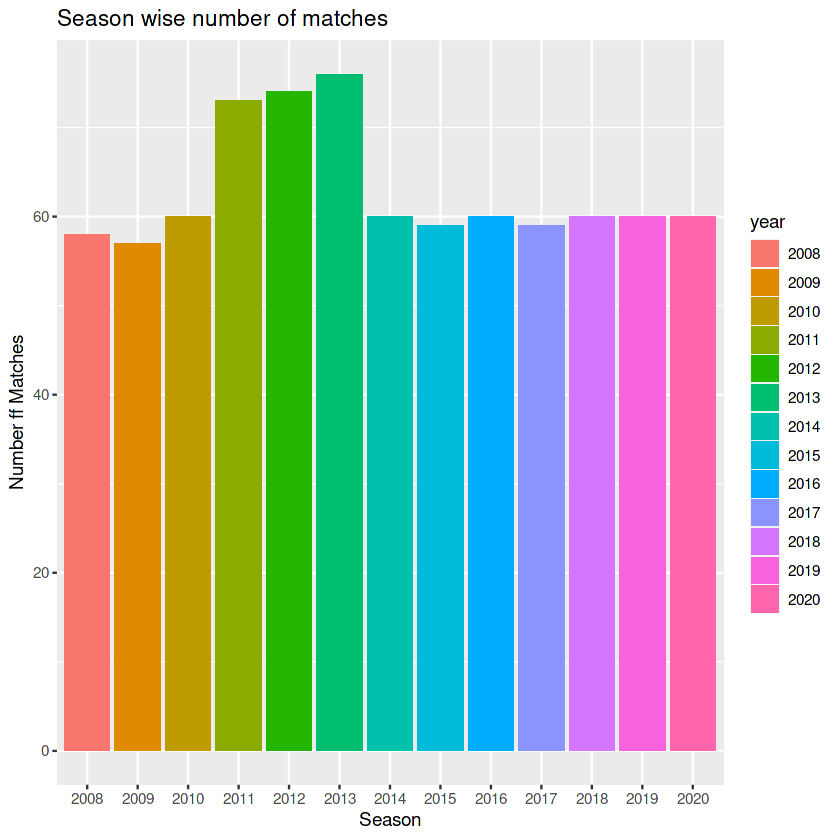

In [19]:
matches %>% 
    group_by(year) %>%
    summarize(number_of_matches=n(),.groups='drop') %>%
    ggplot(aes(x=year, y= number_of_matches, fill=year)) + geom_bar(stat = "identity") +
    labs(x="Season",y="Number ff Matches", title ="Season wise number of matches")

## In season from 2011 to 2013 the matches played are above 60..

## Which Team is dominating in certain cities 

In [20]:
matches %>% 
    filter(result != 'No result') %>%
    group_by(winner,city) %>%
    summarize(wins = n(),.groups='drop') %>%
    arrange(desc(wins)) %>%
    top_n(10)

Selecting by wins



winner,city,wins
<chr>,<chr>,<int>
Mumbai Indians,Mumbai,53
Kolkata Knight Riders,Kolkata,45
Chennai Super Kings,Chennai,40
Rajasthan Royals,Jaipur,32
Kings XI Punjab,Chandigarh,30
Sunrisers Hyderabad,Hyderabad,30
Royal Challengers Bangalore,Bangalore,29
Delhi Daredevils,Delhi,27
Chennai Super Kings,Mumbai,11


## Which team is not able to perform in the no-home locations

In [21]:
matches %>% 
    filter(result != 'No result') %>%
    group_by(winner,city) %>%
    summarize(wins = n(), .groups='drop') %>%
    arrange(city) 


winner,city,wins
<chr>,<chr>,<int>
Chennai Super Kings,Abu Dhabi,3
Delhi Capitals,Abu Dhabi,2
Kings XI Punjab,Abu Dhabi,2
Kolkata Knight Riders,Abu Dhabi,6
Mumbai Indians,Abu Dhabi,6
Rajasthan Royals,Abu Dhabi,6
Royal Challengers Bangalore,Abu Dhabi,2
Sunrisers Hyderabad,Abu Dhabi,2
Delhi Daredevils,Ahmedabad,1


## Who's the best bolwer still dates 

In [22]:
head(deliveries)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


In [23]:
deliveries %>% 
    group_by(bowler) %>%
    summarize(total_runs = sum(total_runs)) %>%
    arrange(total_runs)

bowler,total_runs
<chr>,<int>
AC Gilchrist,0
DA Warner,2
AM Rahane,5
SPD Smith,5
LA Carseldine,6
SN Khan,6
SS Mundhe,6
Y Gnaneswara Rao,7
RS Gavaskar,8


## Run scored and wickets lost in power play

In [24]:
head(matches)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,day,month,year
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,NA,Asad Rauf,RE Koertzen,18,04,2008
2,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,NA,MR Benson,SL Shastri,19,04,2008
3,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,N,NA,Aleem Dar,GA Pratapkumar,19,04,2008
4,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,NA,SJ Davis,DJ Harper,20,04,2008
5,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,NA,BF Bowden,K Hariharan,20,04,2008
6,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6,N,NA,Aleem Dar,RB Tiffin,21,04,2008


In [25]:
head(deliveries)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


#### Combine both the dataset

In [26]:
data <- bind_rows(matches,deliveries)

In [27]:
head(data)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,⋯,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Dataframe contains only powerplay data



In [28]:
power_play <- data %>%
    group_by(over < 6)

In [29]:
head(power_play)

id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,⋯,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,over < 6
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Total powerplay runs, wickets

In [30]:
colnames(data)

[1] "id"               "city"             "date"             "player_of_match" 
 [5] "venue"            "neutral_venue"    "team1"            "team2"           
 [9] "toss_winner"      "toss_decision"    "winner"           "result"          
[13] "result_margin"    "eliminator"       "method"           "umpire1"         
[17] "umpire2"          "day"              "month"            "year"            
[21] "inning"           "over"             "ball"             "batsman"         
[25] "non_striker"      "bowler"           "batsman_runs"     "extra_runs"      
[29] "total_runs"       "non_boundary"     "is_wicket"        "dismissal_kind"  
[33] "player_dismissed" "fielder"          "extras_type"      "batting_team"    
[37] "bowling_team"

## Total runs in the Power play

In [31]:
is.na(power_play$batsman_runs)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [169]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [253]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [289]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [313]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [337]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [349]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [469]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [529]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [553]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [577]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [589]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [6